5.3.1 Text Classification
• Design and implement a system to recommend a conference to a researcher given the title of his new article.
• The system should use the provided Conference Proceedings training data. You should implement the sub-tasks (feature extraction, dimensionality reduction, and classifier) by yourself.
• You are free to select the algorithms you prefer for each sub-task. However, it is recommended that you test and compare multiple methods.
• Evaluate you system on the training set by using the cross-validation approach. Provide the confusion
matrix of your system output.
• Evaluation should be done in terms of Micro-average precision, recall and F1 measures.
• Once you found the best model on the training set, evaluate your model on the test set and report the
results.

In [17]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('DBLPTrainset.txt', sep='\t', header=None, names=['ID', 'Conference', 'Title'])
test_data = pd.read_csv('DBLPTestset.txt', sep='\t', header=None, names=['ID', 'Title'])
ground_truth_labels = pd.read_csv('DBLPTestGroundTruth.txt', sep='\t', header=None, names=['ID', 'Conference'])

In [3]:
# Feature Extraction - TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Title'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['Title'])

# Feature Extraction - Word Embeddings (Word2Vec)
word2vec_model = Word2Vec(sentences=train_data['Title'].apply(str.split), vector_size=100, window=5, min_count=1, workers=4)

def get_word_vector(words):
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

X_train_word2vec = pd.DataFrame([get_word_vector(words) for words in train_data['Title'].apply(str.split)])
X_test_word2vec = pd.DataFrame([get_word_vector(words) for words in test_data['Title'].apply(str.split)])

In [4]:
# svc with TF-IDF
svc_tfidf_classifier = SVC(kernel='linear', C=1.0)
svc_tfidf_classifier.fit(X_train_tfidf, train_data['Conference'])
y_pred_cv = cross_val_predict(svc_tfidf_classifier, X_train_tfidf, train_data['Conference'], cv=5)
conf_matrix_cv = confusion_matrix(train_data['Conference'], y_pred_cv)
print("Confusion Matrix (Cross-Validation): svc TFIDF")
print(conf_matrix_cv)
micro_avg_precision, micro_avg_recall, micro_avg_f1, _ = precision_recall_fscore_support(train_data['Conference'], y_pred_cv, average='micro')
print("\nMicro-average Precision:", micro_avg_precision)
print("Micro-average Recall:", micro_avg_recall)
print("Micro-average F1:", micro_avg_f1)

Confusion Matrix (Cross-Validation): svc TFIDF
[[3965  224   48  103  141]
 [ 232 7042  141   59   40]
 [  40  246 2258   56   78]
 [ 151  141   69 2927  390]
 [ 201  106  117  352 2516]]

Micro-average Precision: 0.8643903340572009
Micro-average Recall: 0.8643903340572009
Micro-average F1: 0.8643903340572009


In [5]:
# Random Forest with TF-IDF
rf_tfidf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf_classifier.fit(X_train_tfidf, train_data['Conference'])
y_pred_cv = cross_val_predict(rf_tfidf_classifier, X_train_tfidf, train_data['Conference'], cv=5)
conf_matrix_cv = confusion_matrix(train_data['Conference'], y_pred_cv)
print("\nConfusion Matrix (Cross-Validation): RF TFIDF")
print(conf_matrix_cv)
micro_avg_precision, micro_avg_recall, micro_avg_f1, _ = precision_recall_fscore_support(train_data['Conference'], y_pred_cv, average='micro')
print("\nMicro-average Precision:", micro_avg_precision)
print("Micro-average Recall:", micro_avg_recall)
print("Micro-average F1:", micro_avg_f1)


Confusion Matrix (Cross-Validation): RF TFIDF
[[3683  375  159  128  136]
 [ 285 6780  320   80   49]
 [  30  316 2187   68   77]
 [ 121  207  241 2758  351]
 [ 191  206  258  396 2241]]

Micro-average Precision: 0.8154599639606339
Micro-average Recall: 0.8154599639606339
Micro-average F1: 0.8154599639606339


In [6]:
# svc with Word2Vec
svc_word2vec_classifier = SVC(kernel='linear', C=1.0)
svc_word2vec_classifier.fit(X_train_word2vec, train_data['Conference'])
y_pred_cv = cross_val_predict(svc_word2vec_classifier, X_train_word2vec, train_data['Conference'], cv=5)
conf_matrix_cv = confusion_matrix(train_data['Conference'], y_pred_cv)
print("\nConfusion Matrix (Cross-Validation): svc WORD2VEC")
print(conf_matrix_cv)
micro_avg_precision, micro_avg_recall, micro_avg_f1, _ = precision_recall_fscore_support(train_data['Conference'], y_pred_cv, average='micro')
print("\nMicro-average Precision:", micro_avg_precision)
print("Micro-average Recall:", micro_avg_recall)
print("Micro-average F1:", micro_avg_f1)


Confusion Matrix (Cross-Validation): svc WORD2VEC
[[2404 1358  144  445  130]
 [ 462 6501  181  221  149]
 [ 164 1611  590   68  245]
 [ 356  819  205 2154  144]
 [ 308 1154  217  250 1363]]

Micro-average Precision: 0.6012105530656563
Micro-average Recall: 0.6012105530656563
Micro-average F1: 0.6012105530656563


In [7]:
# Random Forest with Word2Vec
rf_word2vec_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_word2vec_classifier.fit(X_train_word2vec, train_data['Conference'])
y_pred_cv = cross_val_predict(rf_word2vec_classifier, X_train_word2vec, train_data['Conference'], cv=5)
conf_matrix_cv = confusion_matrix(train_data['Conference'], y_pred_cv)
print("\nConfusion Matrix (Cross-Validation): RF WORD2VEC")
print(conf_matrix_cv)
micro_avg_precision, micro_avg_recall, micro_avg_f1, _ = precision_recall_fscore_support(train_data['Conference'], y_pred_cv, average='micro')
print("\nMicro-average Precision:", micro_avg_precision)
print("Micro-average Recall:", micro_avg_recall)
print("Micro-average F1:", micro_avg_f1)


Confusion Matrix (Cross-Validation): RF WORD2VEC
[[2598  909  157  594  223]
 [ 487 5846  343  448  390]
 [ 137 1180  860  157  344]
 [ 386  539  155 2430  168]
 [ 229 1036  372  319 1336]]

Micro-average Precision: 0.6038904033636742
Micro-average Recall: 0.6038904033636742
Micro-average F1: 0.6038904033636742


In [8]:
pca = PCA(n_components=50)
X_train_tfidf_pca = X_train_tfidf.toarray()
X_test_tfidf_pca = X_test_tfidf.toarray()
X_train_tfidf_pca = pca.fit_transform(X_train_tfidf_pca)
X_test_tfidf_pca = pca.transform(X_test_tfidf_pca)

X_train_word2vec_pca = pca.fit_transform(X_train_word2vec)
X_test_word2vec_pca = pca.transform(X_test_word2vec)

In [9]:
# svc with TF-IDF
svc_tfidf_classifier = SVC(kernel='linear', C=1.0)
svc_tfidf_classifier.fit(X_train_tfidf_pca, train_data['Conference'])
y_pred_cv = cross_val_predict(svc_tfidf_classifier, X_train_tfidf_pca, train_data['Conference'], cv=5)
conf_matrix_cv = confusion_matrix(train_data['Conference'], y_pred_cv)
print("Confusion Matrix (Cross-Validation): svc TFIDF")
print(conf_matrix_cv)
micro_avg_precision, micro_avg_recall, micro_avg_f1, _ = precision_recall_fscore_support(train_data['Conference'], y_pred_cv, average='micro')
print("\nMicro-average Precision:", micro_avg_precision)
print("Micro-average Recall:", micro_avg_recall)
print("Micro-average F1:", micro_avg_f1)

Confusion Matrix (Cross-Validation): svc TFIDF
[[3241  705  251  143  141]
 [ 397 6601  383   86   47]
 [  31  597 1918   64   68]
 [ 151  448  518 2237  324]
 [ 209  324  561  398 1800]]

Micro-average Precision: 0.7298895716859954
Micro-average Recall: 0.7298895716859954
Micro-average F1: 0.7298895716859954


In [10]:
# Random Forest with TF-IDF
rf_tfidf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf_classifier.fit(X_train_tfidf_pca, train_data['Conference'])
y_pred_cv = cross_val_predict(rf_tfidf_classifier, X_train_tfidf_pca, train_data['Conference'], cv=5)
conf_matrix_cv = confusion_matrix(train_data['Conference'], y_pred_cv)
print("\nConfusion Matrix (Cross-Validation): RF TFIDF")
print(conf_matrix_cv)
micro_avg_precision, micro_avg_recall, micro_avg_f1, _ = precision_recall_fscore_support(train_data['Conference'], y_pred_cv, average='micro')
print("\nMicro-average Precision:", micro_avg_precision)
print("Micro-average Recall:", micro_avg_recall)
print("Micro-average F1:", micro_avg_f1)


Confusion Matrix (Cross-Validation): RF TFIDF
[[3572  486   88  161  174]
 [ 431 6606  218  150  109]
 [  94  500 1797  145  142]
 [ 210  275  147 2614  432]
 [ 286  201  169  472 2164]]

Micro-average Precision: 0.7740608972878067
Micro-average Recall: 0.7740608972878067
Micro-average F1: 0.7740608972878067


In [11]:
# svc with Word2Vec
svc_word2vec_classifier = SVC(kernel='linear', C=1.0)
svc_word2vec_classifier.fit(X_train_word2vec_pca, train_data['Conference'])
y_pred_cv = cross_val_predict(svc_word2vec_classifier, X_train_word2vec_pca, train_data['Conference'], cv=5)
conf_matrix_cv = confusion_matrix(train_data['Conference'], y_pred_cv)
print("\nConfusion Matrix (Cross-Validation): svc WORD2VEC")
print(conf_matrix_cv)
micro_avg_precision, micro_avg_recall, micro_avg_f1, _ = precision_recall_fscore_support(train_data['Conference'], y_pred_cv, average='micro')
print("\nMicro-average Precision:", micro_avg_precision)
print("Micro-average Recall:", micro_avg_recall)
print("Micro-average F1:", micro_avg_f1)


Confusion Matrix (Cross-Validation): svc WORD2VEC
[[2405 1356  141  448  131]
 [ 465 6496  182  221  150]
 [ 165 1607  591   69  246]
 [ 354  821  207 2151  145]
 [ 307 1156  217  250 1362]]

Micro-average Precision: 0.6008871228572749
Micro-average Recall: 0.6008871228572749
Micro-average F1: 0.6008871228572749


In [12]:
# Random Forest with Word2Vec
rf_word2vec_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_word2vec_classifier.fit(X_train_word2vec_pca, train_data['Conference'])
y_pred_cv = cross_val_predict(rf_word2vec_classifier, X_train_word2vec_pca, train_data['Conference'], cv=5)
conf_matrix_cv = confusion_matrix(train_data['Conference'], y_pred_cv)
print("\nConfusion Matrix (Cross-Validation): RF WORD2VEC")
print(conf_matrix_cv)
micro_avg_precision, micro_avg_recall, micro_avg_f1, _ = precision_recall_fscore_support(train_data['Conference'], y_pred_cv, average='micro')
print("\nMicro-average Precision:", micro_avg_precision)
print("Micro-average Recall:", micro_avg_recall)
print("Micro-average F1:", micro_avg_f1)


Confusion Matrix (Cross-Validation): RF WORD2VEC
[[2769 1008  140  381  183]
 [ 423 6501  239  199  152]
 [ 108 1229  967  119  255]
 [ 272  495  178 2521  212]
 [ 159  807  263  280 1783]]

Micro-average Precision: 0.6718569514392644
Micro-average Recall: 0.6718569514392644
Micro-average F1: 0.6718569514392644



Confusion Matrix (Cross-Validation): RF WORD2VEC
[[ 393   40    8   29   32]
 [  82 1887   35   29   10]
 [   0   20  156    8    2]
 [  11    7    4  165   32]
 [  23   17   16   54  313]]
Test Set Evaluation: SVC TFIDF
Accuracy: 0.8639193596205159
Precision (Micro): 0.8639193596205159
Recall (Micro): 0.8639193596205159
F1 Score (Micro): 0.8639193596205159


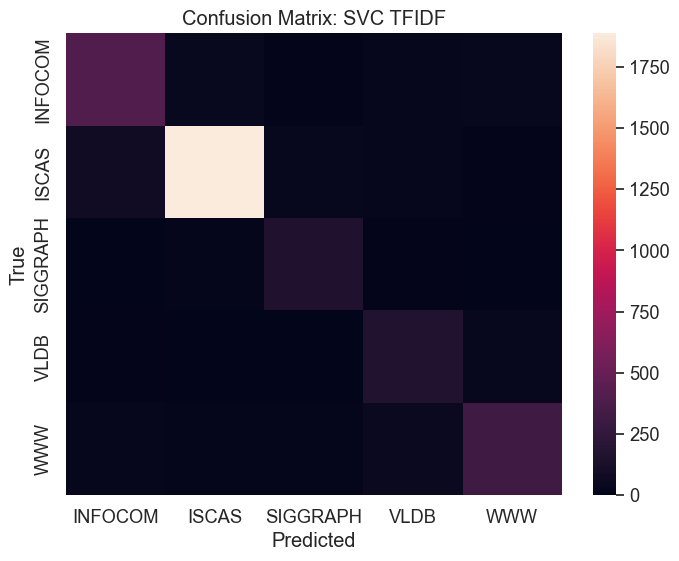

In [22]:
#Best model: SVC with TFIDF without dimensionality reduction
svc_tfidf_classifier = SVC(kernel='linear', C=1.0)
svc_tfidf_classifier.fit(X_train_tfidf, train_data['Conference'])
y_pred = svc_tfidf_classifier.predict(X_test_tfidf)

conf_matrix_cv = confusion_matrix(ground_truth_labels['Conference'], y_pred)
print("\nConfusion Matrix (Cross-Validation): RF WORD2VEC")
print(conf_matrix_cv)

# Evaluate on the test set
accuracy_test_svc_tfidf = accuracy_score(ground_truth_labels['Conference'], y_pred)

# Precision, Recall, F1
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth_labels['Conference'], y_pred, average='micro')

# Print the results
print("Test Set Evaluation: SVC TFIDF")
print("Accuracy:", accuracy_test_svc_tfidf)
print("Precision (Micro):", precision)
print("Recall (Micro):", recall)
print("F1 Score (Micro):", f1)

# Set the font scale for better visualization
sns.set(font_scale=1.2)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, xticklabels=svc_tfidf_classifier.classes_, yticklabels=svc_tfidf_classifier.classes_)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: SVC TFIDF')

# Show the plot
plt.show()

In [16]:
# Assuming 'input_title' is the title of the conference paper you want to classify
input_title = "Designing novel databases with SQL"

# Preprocess the input title (make sure it's in the same format as your training data)
input_title_tfidf = tfidf_vectorizer.transform([input_title])

# Use the trained SVM model to make predictions
predicted_conference = svc_tfidf_classifier.predict(input_title_tfidf)

print("Predicted Conference:", predicted_conference[0])

Predicted Conference: VLDB
